# SpaCy Topic classification
This module holds an example of the steps of training and building a spaCy topic classification model.

In [1]:
## To enable reloading of modules after updates:
%load_ext autoreload
%autoreload 2

## Load the dataset

In [2]:
from Dataset.dataset import Data

dataset = Data("./Dataset/dialogues.json")
data = Data("Dataset/transcribed_dialogues.json")


training = dataset.training_set
validation = data.full_data[:int(len(data.full_data)*0.30)]
test = data.full_data[int(len(data.full_data)*0.30):]

gen_validation = dataset.validation_set
gen_test = dataset.test_set

labels = [ el for el in dataset.example[2]["cats"] ]


In [3]:
from Models.Topic_classification.spaCy_topic import Topic_Classification
model = Topic_Classification(labels)

## Train model on new labels

rainingloss:  0.9473684200554017  Validationloss:  0.39999999968
Trainingloss:  0.9285714279081633  Validationloss:  0.39999999968
Trainingloss:  0.9999999987499999  Validationloss:  0.39999999968
Trainingloss:  0.9999999989999999  Validationloss:  0.39999999968
Trainingloss:  0.9999999988888888  Validationloss:  0.39999999968
Trainingloss:  0.9999999991666666  Validationloss:  0.39999999968
Trainingloss:  0.9999999988888888  Validationloss:  0.39999999968
Trainingloss:  0.9473684200554017  Validationloss:  0.39999999968
Trainingloss:  0.9999999989999999  Validationloss:  0.39999999968
Trainingloss:  0.9999999988888888  Validationloss:  0.39999999968
Trainingloss:  0.9999999988888888  Validationloss:  0.39999999968
Trainingloss:  0.9999999988888888  Validationloss:  0.39999999968
Trainingloss:  0.9999999988888888  Validationloss:  0.39999999968
Trainingloss:  0.9999999989999999  Validationloss:  0.39999999968
Trainingloss:  0.9999999988888888  Validationloss:  0.39999999968
Traininglos

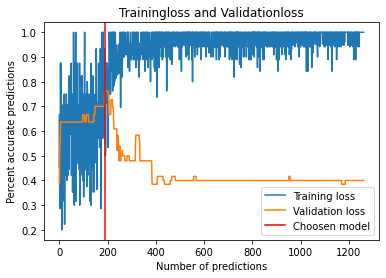

In [4]:
def train_model():
    model.train(training, validation, show_loss=True, show_graph=True, save=True)
    

train_model()

# The final dataset
This is handtranscribed data from the audio data which have been labeled through the datagenerator process.

In [5]:
# Best accuracy on the validationset was:  0.7619047611791383
model = Topic_Classification(labels)
model.load_model("./Models/Topic_classification/Topic_Models/model")
print("Precision: ", model.evaluate(model.model.tokenizer, model.model.get_pipe("textcat_multilabel"), [val[0] for val in test], 
                                                                                 [val[2] for val in test ], "cats")['precision']*100, "%")

print("F score: ", model.evaluate(model.model.tokenizer, model.model.get_pipe("textcat_multilabel"), [val[0] for val in test], 
                                                                                 [val[2] for val in test ], "cats")['f_score']*100, "%")


Precision:  59.090909064049576 %
F score:  53.06122446813827 %


## Training and evaluating on the generated dataset

tionloss:  0.9749999999778408
Trainingloss:  0.999999999090909  Validationloss:  0.9761092149948553
Trainingloss:  0.9411764694809688  Validationloss:  0.9761092149948553
Trainingloss:  0.9411764694809688  Validationloss:  0.9772209566975576
Trainingloss:  0.9999999988888888  Validationloss:  0.9783352337291144
Trainingloss:  0.9999999989999999  Validationloss:  0.9783352337291144
Trainingloss:  0.9999999989999999  Validationloss:  0.9783352337291144
Trainingloss:  0.9999999989999999  Validationloss:  0.9772209566975576
Trainingloss:  0.999999999090909  Validationloss:  0.9761092149948553
Trainingloss:  0.9599999992320001  Validationloss:  0.9749999999778408
Trainingloss:  0.9473684200554017  Validationloss:  0.9694915254018194
Trainingloss:  0.9999999987499999  Validationloss:  0.9683972911745282
Trainingloss:  0.9999999987499999  Validationloss:  0.9640449437985609
Trainingloss:  0.9411764694809688  Validationloss:  0.9629629629413475
Trainingloss:  0.9473684200554017  Validationloss

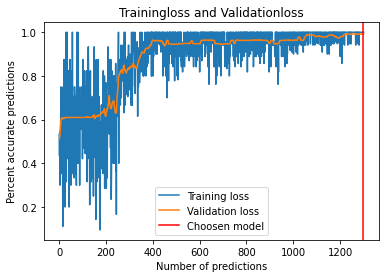

In [11]:
gen_model = Topic_Classification(labels)

def train_model():
    gen_model.train(training, gen_validation, show_loss=True, show_graph=True)

train_model()

In [14]:
model = Topic_Classification(labels)
model.load_model("./Models/Topic_classification/Topic_Models/model")
print("Precision: ", model.evaluate(model.model.tokenizer, model.model.get_pipe("textcat_multilabel"), [val[0] for val in gen_test], 
                                                                                 [val[2] for val in gen_test ], "cats")['precision']*100, "%")
print("F score: ", model.evaluate(model.model.tokenizer, model.model.get_pipe("textcat_multilabel"), [val[0] for val in gen_test], 
                                                                                 [val[2] for val in gen_test ], "cats")['f_score']*100, "%")

Precision:  99.11111110890864 %
F score:  99.33184855012624 %
